In [1]:
import pandas as pd
import numpy
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
import re
from wordcloud import WordCloud

In [2]:
dataOriginal = pd.read_csv("train.csv", encoding= "ISO-8859-1",names=['target','id','date','flag','user','text'])

In [3]:
data = dataOriginal.copy(deep=True)
dataCopy = dataOriginal.copy(deep=True)

In [4]:
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [6]:
data['target'].value_counts()

4    800000
0    800000
Name: target, dtype: int64

In [7]:
data['flag'].value_counts()

NO_QUERY    1600000
Name: flag, dtype: int64

In [8]:
data=data.drop(['flag'],axis=1)

In [9]:
type(data.date[0])

str

In [10]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [11]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [12]:
data.text=data.text.apply(lambda tweet: preprocess(tweet))

In [13]:
data.text[:5]

0         awww bummer shoulda got david carr third day
1    upset update facebook texting might cry result...
2    dived many times ball managed save 50 rest go ...
3                     whole body feels itchy like fire
4                                     behaving mad see
Name: text, dtype: object

In [14]:
dataPositive=data[data['target']==4]
dataNegative=data[data['target']==0]

In [15]:
tweetss=""
for val in dataPositive.text:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
    tweetss += " ".join(tokens)+" "

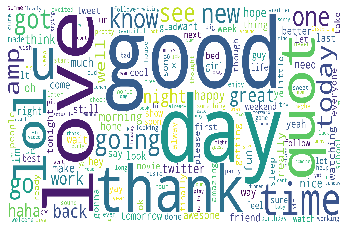

In [16]:
word_cloud = WordCloud(width=2000, height=1000, collocations = False, background_color = 'white').generate(tweetss)
plt.imshow(word_cloud, interpolation='nearest', aspect='auto')
plt.axis("off")
plt.show()

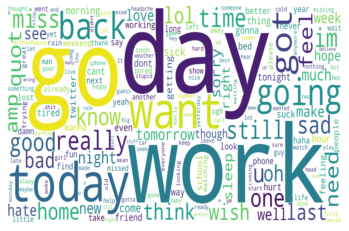

In [17]:
word_cloud = WordCloud(width=5000, height=2500, collocations = False, background_color = 'white').generate(' '.join(map(str,dataNegative.text)))
plt.imshow(word_cloud, interpolation='bilinear', aspect='auto')
plt.axis("off")
plt.show()

In [21]:
print(word_cloud)

In [25]:
data['date'].value_counts()

Mon Jun 15 12:53:14 PDT 2009    20
Fri May 29 13:40:04 PDT 2009    17
Fri May 22 05:10:17 PDT 2009    17
Mon Jun 15 13:39:50 PDT 2009    17
Fri Jun 05 11:05:33 PDT 2009    16
                                ..
Sat Jun 20 14:16:45 PDT 2009     1
Thu Jun 04 09:07:50 PDT 2009     1
Mon Jun 15 07:51:08 PDT 2009     1
Sat Jun 06 08:31:10 PDT 2009     1
Sat Jun 06 12:29:57 PDT 2009     1
Name: date, Length: 774363, dtype: int64

In [26]:
data[data['date']=='Mon Jun 15 12:53:14 PDT 2009']

,target,id,date,user,text
487690,0,2182223420,Mon Jun 15 12:53:14 PDT 2009,OndaDarlin,grieving loss friend feeling ashamed keeping t...
487693,0,2182223569,Mon Jun 15 12:53:14 PDT 2009,NKFan1,sad aussie fans know guys would make work could
487694,0,2182223592,Mon Jun 15 12:53:14 PDT 2009,JadeIce,month treatment sent see eye specialist curren...
487695,0,2182223644,Mon Jun 15 12:53:14 PDT 2009,Scots75,played short session today one stack nine go
487696,0,2182223692,Mon Jun 15 12:53:14 PDT 2009,superbritty,feel good
487697,0,2182223766,Mon Jun 15 12:53:14 PDT 2009,gnr180,ordered large double 1 4 lb meal mcd coke glas...
1545803,4,2182223600,Mon Jun 15 12:53:14 PDT 2009,Justinsmommy79,yep sure audrey friend kristie telling u added...
1545805,4,2182223625,Mon Jun 15 12:53:14 PDT 2009,cpfef29,wait see
1545806,4,2182223635,Mon Jun 15 12:53:14 PDT 2009,tweeteradder31,get 100 followers day using www tweeterfollow ...
1545807,4,2182223658,Mon Jun 15 12:53:14 PDT 2009,ashleighbaker08,sounds yummy


In [44]:
data['user'].value_counts()[:20]

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
mcraddictal        276
tsarnick           248
what_bugs_u        246
Karen230683        238
DarkPiano          236
SongoftheOss       227
Jayme1988          225
keza34             219
ramdomthoughts     216
shanajaca          213
wowlew             212
TraceyHewins       211
nuttychris         211
thisgoeshere       207
Spidersamm         205
Name: user, dtype: int64

In [29]:
data[data['user']=='lost_dog']

,target,id,date,user,text
43935,0,1676704158,Fri May 01 22:54:02 PDT 2009,lost_dog,lost please help find good home
45574,0,1677189389,Sat May 02 00:51:35 PDT 2009,lost_dog,lost please help find good home
46919,0,1677519173,Sat May 02 02:30:50 PDT 2009,lost_dog,lost please help find good home
47949,0,1677752995,Sat May 02 03:47:51 PDT 2009,lost_dog,lost please help find good home
50572,0,1678544903,Sat May 02 07:02:28 PDT 2009,lost_dog,lost please help find good home
...,...,...,...,...,...
792409,0,2326272045,Thu Jun 25 06:48:18 PDT 2009,lost_dog,lost please help find good home
793314,0,2326588770,Thu Jun 25 07:14:42 PDT 2009,lost_dog,lost please help find good home
793610,0,2326689658,Thu Jun 25 07:22:51 PDT 2009,lost_dog,lost please help find good home
798608,0,2328636087,Thu Jun 25 09:49:04 PDT 2009,lost_dog,lost please help find good home


In [30]:
data[data['user']=='lost_dog'].text.value_counts()

lost please help find good home    549
Name: text, dtype: int64

In [32]:
data[data['user']=='tweetpet'].text.value_counts()

clean                    285
hungry                    19
hungry type feed feed      6
Name: text, dtype: int64

In [33]:
data[data['user']=='SallytheShizzle'].text.value_counts()

oh well hol house makes asa asa makes asa even sa                             1
fair enough slap vis comm teachers face kk lmao thursday thursday thursday    1
oh totally                                                                    1
haha yaaay haha get hurt peoples ears                                         1
haha yeah remember days folios insane mean make people                        1
                                                                             ..
oww bit inside mouth taste copper                                             1
pfft wont family looking suits shit want kevin scarf get                      1
thanks omg reeeally cool kinda scary talented way compare though different    1
tv time                                                                       1
                                                                              1
Name: text, Length: 281, dtype: int64

In [34]:
data[data['user']=='VioletsCRUK'].text.value_counts()

thanks x                                                                                  2
suck good excuse absolutely nothing working today xx                                      1
lol awk salad like greek salad night piss though thinking bout pasta                      1
thanks maureen g night xx                                                                 1
oh hello nice meet shall follow back today                                                1
                                                                                         ..
glasgowlassy right downloaded bloody thing added 2 f n mic work grrrr                     1
oh crap lol think may sign try sort pic situation thanks letting know                     1
eyes hardly staying open either need bath wee nap think shall tweet yas xx karen230683    1
heehee shall catch ya later byeeeeeeeeeee                                                 1
burnt roof mouth mashed potato earlier big blister whats best bonjela something 

In [37]:
data['text'].duplicated

<bound method Series.duplicated of 0               awww bummer shoulda got david carr third day
1          upset update facebook texting might cry result...
2          dived many times ball managed save 50 rest go ...
3                           whole body feels itchy like fire
4                                           behaving mad see
                                 ...                        
1599995                        woke school best feeling ever
1599996             thewdb com cool hear old walt interviews
1599997                      ready mojo makeover ask details
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1600000, dtype: object>

In [42]:
dataDuplicatesDropped=dataCopy.drop_duplicates(subset=['text'])

In [43]:
len(data)-len(dataDuplicatesDropped)

18534